In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import psycopg2 as pg
from sqlalchemy import create_engine

In [3]:
from datetime import datetime
from time import time

In [4]:
#connection = pg.connect("dbname=mydatabase user=postgres")
# connection = pg.connect("host='102.153.103.22' dbname=dbtest user=admin password='passwords'")
#nowwhat.river42.com:5432
#connection = pg.connect("host='poc-luftdaten_db_1' port='5432' dbname='luftdaten' user='luftdaten' password='luftdaten42'")
connection = pg.connect("host='nowwhat.river42.com' port='5432' dbname='luftdaten' user='luftdaten' password='luftdaten42'")

In [5]:
#x = pd.read_sql_query('select count(*) from "hub_sensor"', con=connection)
#y = pd.read_sql_query('select count(*) from "sat_dht22"', con=connection)
#z = pd.read_sql_query('select count(*) from "sat_ppd42ns"', con=connection)

#u = pd.read_sql_query('select count(*) from "sat_bme280"', con=connection)
v = pd.read_sql_query('select count(*) from "sat_sds011"', con=connection)

In [6]:
#pd.read_sql_query('select * from "pg_tables"'' where tableowner = 'luftdaten'', con=connection);
#list_tables = pd.read_sql_query('select * from "pg_tables"', con=connection);

In [7]:
print(v)

       count
0  199558008


In [8]:
df = pd.read_sql_query('select * from sat_sds011 FETCH FIRST 10 ROWS ONLY',con=connection)

In [9]:
df.head()

sat_ppd42ns_id  sensor_id  location                         ts  \
0          226824        263       117 2018-11-19 13:00:19.253370   
1          226836        263       117 2018-11-19 13:00:19.258398   
2          226845        263       117 2018-11-19 13:00:19.262474   
3          226854        263       117 2018-11-19 13:00:19.273600   
4          226863        263       117 2018-11-19 13:00:19.279173   

             value_ts     p1  dur_p1  ratio_p1     p2  dur_p2  ratio_p2  
0 2017-01-03 01:27:46  16.55     NaN       NaN  11.78     NaN       NaN  
1 2017-01-03 01:28:44  14.38     NaN       NaN  11.05     NaN       NaN  
2 2017-01-03 01:29:41  13.95     NaN       NaN  11.88     NaN       NaN  
3 2017-01-03 01:30:38  15.37     NaN       NaN  11.28     NaN       NaN  
4 2017-01-03 01:31:35  13.17     NaN       NaN  10.52     NaN       NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
sat_ppd42ns_id    10 non-null int64
sensor_id         10 non-null int64
location          10 non-null int64
ts                10 non-null datetime64[ns]
value_ts          10 non-null datetime64[ns]
p1                10 non-null float64
dur_p1            0 non-null float64
ratio_p1          0 non-null float64
p2                10 non-null float64
dur_p2            0 non-null float64
ratio_p2          0 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 960.0 bytes


In [11]:
dfv= pd.read_sql_query('select * from sat_sds011 where location = 84',con=connection)

In [12]:
dfv.tail()

sat_ppd42ns_id  sensor_id  location                         ts  \
205959          175964        189        84 2018-11-19 12:59:51.910237   
205960          175976        189        84 2018-11-19 12:59:51.915964   
205961          175987        189        84 2018-11-19 12:59:51.922739   
205962          175998        189        84 2018-11-19 12:59:51.929174   
205963          176010        189        84 2018-11-19 12:59:51.936082   

                  value_ts     p1  dur_p1  ratio_p1    p2  dur_p2  ratio_p2  
205959 2017-01-03 15:22:02  11.12     NaN       NaN  6.17     NaN       NaN  
205960 2017-01-03 15:23:02  10.08     NaN       NaN  6.25     NaN       NaN  
205961 2017-01-03 15:23:54  10.15     NaN       NaN  5.80     NaN       NaN  
205962 2017-01-03 15:24:52  12.15     NaN       NaN  5.97     NaN       NaN  
205963 2017-01-03 15:25:50  10.52     NaN       NaN  6.22     NaN       NaN

In [13]:
dfv.head()

sat_ppd42ns_id  sensor_id  location                         ts  \
0          255972        189        84 2018-11-19 13:00:33.445010   
1          255985        189        84 2018-11-19 13:00:33.452374   
2          255994        189        84 2018-11-19 13:00:33.456547   
3          256002        189        84 2018-11-19 13:00:33.460464   
4          256009        189        84 2018-11-19 13:00:33.463705   

             value_ts     p1  dur_p1  ratio_p1    p2  dur_p2  ratio_p2  
0 2017-01-03 15:26:48  16.77     NaN       NaN  6.12     NaN       NaN  
1 2017-01-03 15:27:46  10.75     NaN       NaN  5.90     NaN       NaN  
2 2017-01-03 15:28:45  11.72     NaN       NaN  5.80     NaN       NaN  
3 2017-01-03 15:29:43   7.90     NaN       NaN  5.15     NaN       NaN  
4 2017-01-03 15:30:41  10.30     NaN       NaN  5.72     NaN       NaN

In [14]:
dfv.describe()

sat_ppd42ns_id  sensor_id  location             p1  dur_p1  ratio_p1  \
count    2.059640e+05   205964.0  205964.0  205964.000000     0.0       0.0   
mean     3.040344e+07      189.0      84.0      36.631657     NaN       NaN   
std      3.097107e+07        0.0       0.0      72.389914     NaN       NaN   
min      5.938200e+04      189.0      84.0       1.120000     NaN       NaN   
25%      4.922658e+06      189.0      84.0       7.850000     NaN       NaN   
50%      1.775554e+07      189.0      84.0      14.870000     NaN       NaN   
75%      4.880954e+07      189.0      84.0      35.200000     NaN       NaN   
max      1.162300e+08      189.0      84.0    1999.900000     NaN       NaN   

                  p2  dur_p2  ratio_p2  
count  205964.000000     0.0       0.0  
mean       14.679976     NaN       NaN  
std        24.183338     NaN       NaN  
min         0.900000     NaN       NaN  
25%         3.850000     NaN       NaN  
50%         7.200000     NaN       NaN  
75%        17.930000     NaN       NaN  
max       609.680000     NaN       NaN

In [15]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205964 entries, 0 to 205963
Data columns (total 11 columns):
sat_ppd42ns_id    205964 non-null int64
sensor_id         205964 non-null int64
location          205964 non-null int64
ts                205964 non-null datetime64[ns]
value_ts          205964 non-null datetime64[ns]
p1                205964 non-null float64
dur_p1            0 non-null float64
ratio_p1          0 non-null float64
p2                205964 non-null float64
dur_p2            0 non-null float64
ratio_p2          0 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 17.3 MB


In [16]:
dfv2 = dfv.drop(['sat_ppd42ns_id','sensor_id','location','dur_p1','ratio_p1','p2','dur_p2','ratio_p2','ts'], axis=1)

In [17]:
dfv2.head()

value_ts     p1
0 2017-01-03 15:26:48  16.77
1 2017-01-03 15:27:46  10.75
2 2017-01-03 15:28:45  11.72
3 2017-01-03 15:29:43   7.90
4 2017-01-03 15:30:41  10.30

In [18]:
dfv2['hour'] = dfv2['value_ts'].dt.hour

In [19]:
dfv2['date'] = dfv2['value_ts'].dt.date

In [20]:
dfv2.head()

value_ts     p1  hour        date
0 2017-01-03 15:26:48  16.77    15  2017-01-03
1 2017-01-03 15:27:46  10.75    15  2017-01-03
2 2017-01-03 15:28:45  11.72    15  2017-01-03
3 2017-01-03 15:29:43   7.90    15  2017-01-03
4 2017-01-03 15:30:41  10.30    15  2017-01-03

In [21]:
dfv3 = dfv2.drop('value_ts', axis=1)

In [22]:
dfv4 = dfv3.groupby(['date','hour']).mean()

In [23]:
dfv4.head()

p1
date       hour             
2017-01-01 0     1218.825082
           1      962.707419
           2      783.003226
           3      664.869032
           4      592.245323

In [24]:
dfv4.tail()

p1
date       hour           
2017-08-01 2     16.923333
           3     22.235217
           4     20.048696
           5     15.818261
           6     13.370417

In [25]:
dfv4.describe()

p1
count  4822.000000
mean     28.893737
std      59.807162
min       1.465574
25%       7.165489
50%      11.776522
75%      23.110547
max    1218.825082

In [26]:
dfv4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4822 entries, (2017-01-01, 0) to (2017-08-01, 6)
Data columns (total 1 columns):
p1    4822 non-null float64
dtypes: float64(1)
memory usage: 53.7 KB


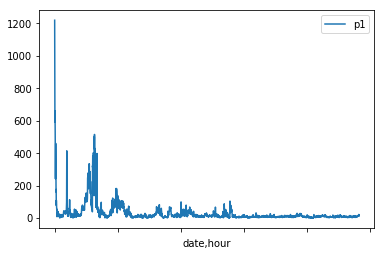

In [27]:
dfv4.plot()

In [28]:
train_set = dfv4.head(4824-24)

In [29]:
test_set = dfv4.tail(24)

# Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
train_scaled = scaler.fit_transform(train_set)

In [33]:
test_scaled = scaler.transform(test_set)

In [34]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [35]:
import tensorflow as tf

In [36]:
num_inputs = 1
num_time_steps = 24
num_neurons = 100
num_outputs = 1
learning_rate = 0.01 
num_train_iterations = 4000
batch_size = 1

In [37]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [38]:
# Alternative GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

In [39]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [40]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [41]:
init = tf.global_variables_initializer()

In [42]:
saver = tf.train.Saver()

# Session

In [43]:
with tf.Session() as sess:
   
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled, batch_size, num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model_luft")

0 	MSE: 0.0024639172
100 	MSE: 0.0012583305
200 	MSE: 2.28693e-05
300 	MSE: 8.241991e-06
400 	MSE: 6.0494665e-05
500 	MSE: 3.2217737e-05
600 	MSE: 4.6742143e-06
700 	MSE: 2.891975e-06
800 	MSE: 1.0828987e-05
900 	MSE: 6.747563e-06
1000 	MSE: 1.2170713e-05
1100 	MSE: 0.0003523076
1200 	MSE: 4.328196e-05
1300 	MSE: 0.00021965565
1400 	MSE: 2.6856744e-05
1500 	MSE: 1.12857e-06
1600 	MSE: 1.2992244e-05
1700 	MSE: 3.7196693e-05
1800 	MSE: 1.7807762e-06
1900 	MSE: 2.5947002e-05
2000 	MSE: 3.0114075e-05
2100 	MSE: 4.361302e-05
2200 	MSE: 3.9802082e-05
2300 	MSE: 8.465889e-06
2400 	MSE: 1.1209733e-05
2500 	MSE: 2.7077738e-06
2600 	MSE: 3.7307557e-06
2700 	MSE: 2.4312607e-05
2800 	MSE: 2.1250655e-06
2900 	MSE: 5.6875347e-06
3000 	MSE: 6.423731e-05
3100 	MSE: 1.8638319e-05
3200 	MSE: 2.211633e-06
3300 	MSE: 3.512007e-05
3400 	MSE: 6.8809306e-05
3500 	MSE: 1.5497826e-05
3600 	MSE: 6.877401e-06
3700 	MSE: 4.2756014e-06
3800 	MSE: 0.00012164834
3900 	MSE: 9.515684e-06


In [44]:
test_set

p1
date       hour           
2017-07-31 7     12.519583
           8     10.384783
           9     11.000000
           10    12.719583
           11    11.828333
           12    11.798800
           13    16.287500
           14    14.534400
           15    14.211667
           16    12.499048
           17    11.727083
           18    12.912083
           19    13.549167
           20    13.132500
           21    13.169130
           22    12.920000
           23    18.532609
2017-08-01 0     17.561667
           1     21.978095
           2     16.923333
           3     22.235217
           4     20.048696
           5     15.818261
           6     13.370417

In [45]:
train_scaled[-24:]

array([[0.00404124],
       [0.00334762],
       [0.00384874],
       [0.00436827],
       [0.00400273],
       [0.00474888],
       [0.00480227],
       [0.00351054],
       [0.00389868],
       [0.00434221],
       [0.00509936],
       [0.00735664],
       [0.00552307],
       [0.00774786],
       [0.00764205],
       [0.009349  ],
       [0.00918209],
       [0.0093579 ],
       [0.01090213],
       [0.01063799],
       [0.01041107],
       [0.00963746],
       [0.00908032],
       [0.00732668]])

In [46]:
train_scaled[-24:].reshape(1, num_time_steps,1)

array([[[0.00404124],
        [0.00334762],
        [0.00384874],
        [0.00436827],
        [0.00400273],
        [0.00474888],
        [0.00480227],
        [0.00351054],
        [0.00389868],
        [0.00434221],
        [0.00509936],
        [0.00735664],
        [0.00552307],
        [0.00774786],
        [0.00764205],
        [0.009349  ],
        [0.00918209],
        [0.0093579 ],
        [0.01090213],
        [0.01063799],
        [0.01041107],
        [0.00963746],
        [0.00908032],
        [0.00732668]]])

In [47]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model_luft")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-24:])
    
    ## Now create a for loop that 
    for iteration in range(24):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model_luft


In [48]:
train_seed

[array([0.00404124]),
 array([0.00334762]),
 array([0.00384874]),
 array([0.00436827]),
 array([0.00400273]),
 array([0.00474888]),
 array([0.00480227]),
 array([0.00351054]),
 array([0.00389868]),
 array([0.00434221]),
 array([0.00509936]),
 array([0.00735664]),
 array([0.00552307]),
 array([0.00774786]),
 array([0.00764205]),
 array([0.009349]),
 array([0.00918209]),
 array([0.0093579]),
 array([0.01090213]),
 array([0.01063799]),
 array([0.01041107]),
 array([0.00963746]),
 array([0.00908032]),
 array([0.00732668]),
 0.0057906657,
 0.0046680123,
 0.003859207,
 0.0032771379,
 0.0028582662,
 0.002556771,
 0.0023397058,
 0.0021834224,
 0.0020708442,
 0.001989767,
 0.0019313246,
 0.0018891692,
 0.0018588454,
 0.0018369406,
 0.0018211603,
 0.0018097609,
 0.0018015504,
 0.0017956346,
 0.0017913729,
 0.0017883033,
 0.001786083,
 0.0017844886,
 0.0017833412,
 0.0017825365]

In [49]:
results = scaler.inverse_transform(np.array(train_seed[24:]).reshape(24,1))

In [50]:
test_set['Generated'] = results

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
test_set

p1  Generated
date       hour                      
2017-07-31 7     12.519583   8.514895
           8     10.384783   7.148223
           9     11.000000   6.163616
           10    12.719583   5.455029
           11    11.828333   4.945111
           12    11.798800   4.578083
           13    16.287500   4.313837
           14    14.534400   4.123584
           15    14.211667   3.986536
           16    12.499048   3.887836
           17    11.727083   3.816690
           18    12.912083   3.765372
           19    13.549167   3.728457
           20    13.132500   3.701791
           21    13.169130   3.682580
           22    12.920000   3.668703
           23    18.532609   3.658708
2017-08-01 0     17.561667   3.651507
           1     21.978095   3.646318
           2     16.923333   3.642582
           3     22.235217   3.639879
           4     20.048696   3.637938
           5     15.818261   3.636541
           6     13.370417   3.635561

In [52]:
test_set.plot()

In [53]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205964 entries, 0 to 205963
Data columns (total 11 columns):
sat_ppd42ns_id    205964 non-null int64
sensor_id         205964 non-null int64
location          205964 non-null int64
ts                205964 non-null datetime64[ns]
value_ts          205964 non-null datetime64[ns]
p1                205964 non-null float64
dur_p1            0 non-null float64
ratio_p1          0 non-null float64
p2                205964 non-null float64
dur_p2            0 non-null float64
ratio_p2          0 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 17.3 MB


In [54]:
dfv.to_csv('luftinfo_loc84')

In [55]:
pwd


'/home/jovyan/work/jupyter-notebooks'

In [56]:
df=pd.read_csv('luftinfo_loc84')

In [57]:
df.head()

Unnamed: 0  sat_ppd42ns_id  sensor_id  location  \
0           0          255972        189        84   
1           1          255985        189        84   
2           2          255994        189        84   
3           3          256002        189        84   
4           4          256009        189        84   

                           ts                    value_ts     p1  dur_p1  \
0  2018-11-19 13:00:33.445010  2017-01-03 15:26:48.000000  16.77     NaN   
1  2018-11-19 13:00:33.452374  2017-01-03 15:27:46.000000  10.75     NaN   
2  2018-11-19 13:00:33.456547  2017-01-03 15:28:45.000000  11.72     NaN   
3  2018-11-19 13:00:33.460464  2017-01-03 15:29:43.000000   7.90     NaN   
4  2018-11-19 13:00:33.463705  2017-01-03 15:30:41.000000  10.30     NaN   

   ratio_p1    p2  dur_p2  ratio_p2  
0       NaN  6.12     NaN       NaN  
1       NaN  5.90     NaN       NaN  
2       NaN  5.80     NaN       NaN  
3       NaN  5.15     NaN       NaN  
4       NaN  5.72     NaN       NaN